## Grain Growth Solved using the Spectral Method

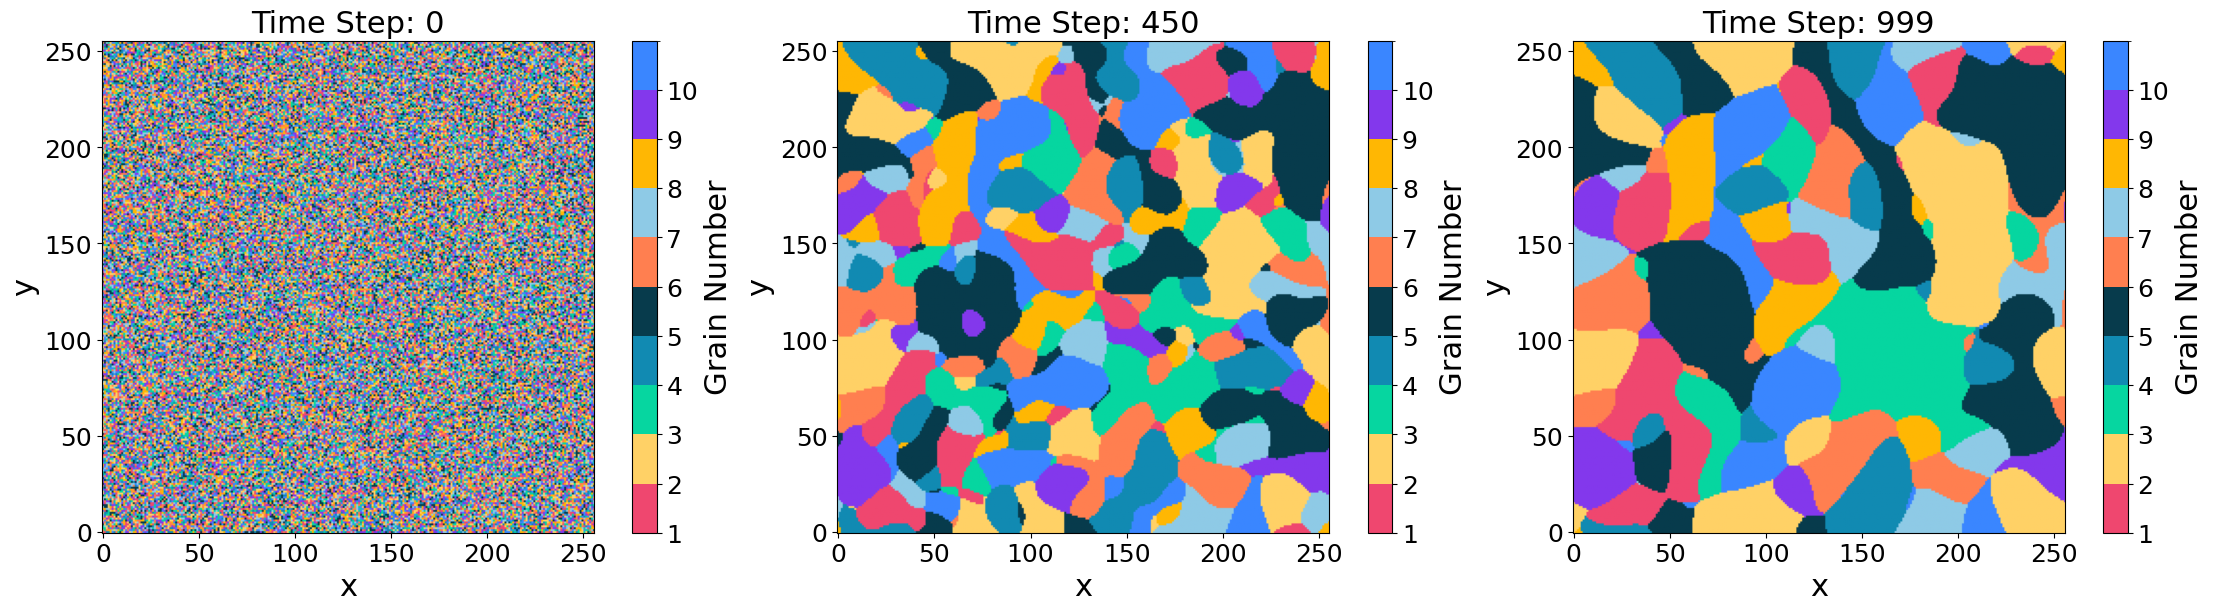

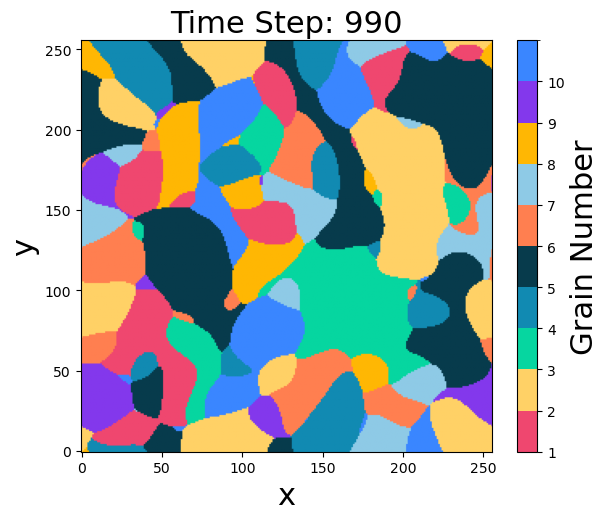

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors as mcolors
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap, BoundaryNorm

# Parameters
Nx = Ny = 256
dx = dy = 1.0  
dt = 1e-2     ## low - for comparision with FDM
nstep = 1000
print_step = 10
Ngrains = 10  

# Model parameters
''' Tried few other values by Hit and Trial Method'''
alpha = 0.5
beta = 2.5
gamma = 1.0
L = 1
kappa = 10.0   ## High - to see prominant grain growth

# random seed - for comparision 
np.random.seed(0)

# Initialize eta arrays using a random array (phi)
phi = np.random.randint(Ngrains, size=(Nx, Ny))
eta = {i: np.zeros((Nx, Ny)) for i in range(1, Ngrains + 1)}
for i in range(Nx):
    for j in range(Ny):
        eta[phi[i, j] + 1][i, j] = 1

# Fourier variables
kx = np.fft.fftfreq(Nx, d=dx) * 2 * np.pi
ky = np.fft.fftfreq(Ny, d=dy) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)
kpow2 = KX**2 + KY**2

# Store grain maps
grain_maps = []

# Time evolution
for step in range(nstep):
    etas_new = np.zeros((Ngrains, Nx, Ny))
    
    for i in range(1, Ngrains + 1):
        eta_i = eta[i]
        sum_eta_j_sq = np.sum([eta[j]**2 for j in range(1, Ngrains + 1) if j != i], axis=0)

        g = -alpha * eta_i + beta * eta_i**3 + 2 * gamma * eta_i * sum_eta_j_sq
        g_hat = np.fft.fft2(g)
        eta_hat = np.fft.fft2(eta_i)

        numerator = eta_hat - dt * L * g_hat
        denominator = 1 + dt * L * kappa * kpow2
        eta_i_new = numerator / denominator
        etas_new[i-1] = np.real(np.fft.ifft2(eta_i_new))

    for i in range(1, Ngrains + 1):
        eta[i] = etas_new[i - 1].copy() # i-1 to ensure correct indexing of the etas arrays
        
    if step % print_step == 0:
        grain_map = np.argmax(etas_new, axis=0) + 1 # Recording eta values to plot later
        grain_maps.append(grain_map.copy())

# Grain Colours used for four grain plots
# default_colors = np.array([
#     [0, 48, 146],     
#     [0, 135, 158],   
#     [255, 171, 91],  
#     [255, 242, 219],  
#     [200, 50, 100],   
#     [150, 255, 100],  
#     [255, 255, 100], 
#     [50, 50, 255]     
# ]) / 255.0

"""Grain Colours used for ten grain plots"""
default_colors = np.array([
    [239, 71, 111],   
    [255, 209, 102],  
    [6, 214, 160],    
    [17, 138, 178],   
    [7, 59, 76],      
    [255, 127, 80],   
    [142, 202, 230],  
    [255, 183, 3],    
    [131, 56, 236],   
    [58, 134, 255]    
]) / 255.0



if Ngrains <= len(default_colors):
    grain_colors = default_colors[:Ngrains]
else: # Takes random colours if Ngrains is more than the number of specified colours
    rng = np.random.default_rng(42)
    grain_colors = rng.uniform(0, 1, size=(Ngrains, 3))
    
    
'''Plotting'''
    
cmap = ListedColormap(grain_colors)
norm = BoundaryNorm(boundaries=np.arange(1, Ngrains + 2), ncolors=Ngrains)


snapshot_steps = [0, 450, nstep - 1]
fig, axs = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

for i, ax in enumerate(axs):
    index = snapshot_steps[i] // print_step
    rgb_image = grain_colors[grain_maps[index] - 1]
    im = ax.imshow(rgb_image, origin='lower', cmap=cmap, norm=norm)
    ax.set_title(f'Time Step: {snapshot_steps[i]}', fontsize=22)
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.tick_params(axis='both', labelsize=18)
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_ticks(np.arange(1, Ngrains + 1))
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Grain Number', fontsize=22)
    
# plt.savefig('Grain_fft10.png', dpi = 300)

plt.show()


'''Animating'''

fig2, ax2 = plt.subplots(figsize=(6, 6), constrained_layout=True)
rgb_image0 = grain_colors[grain_maps[0] - 1]
im = ax2.imshow(rgb_image0, origin='lower', cmap=cmap, norm=norm)
ax2.set_xlabel('x', fontsize=22)
ax2.set_ylabel('y', fontsize=22)
ax.tick_params(axis='both', labelsize=18)



cbar = fig2.colorbar(im, ax=ax2, orientation='vertical', fraction=0.05, pad=0.05, norm=norm)
cbar.set_ticks(np.arange(1, Ngrains + 1))
cbar.set_label('Grain Number', fontsize=22)

def update(frame):
    rgb_image = grain_colors[grain_maps[frame] - 1]
    im.set_array(rgb_image)
    ax2.set_title(f'Time Step: {frame * print_step}', fontsize=22)
    return [im]

ani = FuncAnimation(fig2, update, frames=len(grain_maps), interval=200, blit=True)
ani.save("grain_growth_try2.gif", writer='pillow', fps=10, dpi=200)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors as mcolors
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap, BoundaryNorm

# Parameters
Nx = Ny = 256
dx = dy = 1.0  
dt = 1e-2     ## low - for comparision with FDM
nstep = 1000
print_step = 100
Ngrains = 4  

# Model parameters
''' Tried few other values by Hit and Trial Method'''
alpha = 0.5
beta = 2.5
gamma = 1.0
L = 1
kappa = 10.0   ## High - to see prominant grain growth

# random seed - for comparision 
np.random.seed(0)

# Initialize eta arrays using a random array (phi)
phi = np.random.randint(Ngrains, size=(Nx, Ny))
eta = {i: np.zeros((Nx, Ny)) for i in range(1, Ngrains + 1)}
for i in range(Nx):
    for j in range(Ny):
        eta[phi[i, j] + 1][i, j] = 1

# Fourier variables
kx = np.fft.fftfreq(Nx, d=dx) * 2 * np.pi
ky = np.fft.fftfreq(Ny, d=dy) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)
kpow2 = KX**2 + KY**2

# Store grain maps
grain_maps = []

# Time evolution
for step in range(nstep):
    etas_new = np.zeros((Ngrains, Nx, Ny))
    
    for i in range(1, Ngrains + 1):
        eta_i = eta[i]
        sum_eta_j_sq = np.sum([eta[j]**2 for j in range(1, Ngrains + 1) if j != i], axis=0)

        g = -alpha * eta_i + beta * eta_i**3 + 2 * gamma * eta_i * sum_eta_j_sq
        g_hat = np.fft.fft2(g)
        eta_hat = np.fft.fft2(eta_i)

        numerator = eta_hat - dt * L * g_hat
        denominator = 1 + dt * L * kappa * kpow2
        eta_i_new = numerator / denominator
        etas_new[i-1] = np.real(np.fft.ifft2(eta_i_new))

    for i in range(1, Ngrains + 1):
        eta[i] = etas_new[i - 1].copy() # i-1 to ensure correct indexing of the etas arrays
        
    if step % print_step == 0:
        grain_map = np.argmax(etas_new, axis=0) + 1 # Recording eta values to plot later
        grain_maps.append(grain_map.copy())

# Grain Colours used for four grain plots
default_colors = np.array([
    [0, 48, 146],     
    [0, 135, 158],   
    [255, 171, 91],  
    [255, 242, 219],  
    [200, 50, 100],   
    [150, 255, 100],  
    [255, 255, 100], 
    [50, 50, 255]     
]) / 255.0

"""Grain Colours used for ten grain plots"""
# default_colors = np.array([
#     [239, 71, 111],   
#     [255, 209, 102],  
#     [6, 214, 160],    
#     [17, 138, 178],   
#     [7, 59, 76],      
#     [255, 127, 80],   
#     [142, 202, 230],  
#     [255, 183, 3],    
#     [131, 56, 236],   
#     [58, 134, 255]    
# ]) / 255.0



if Ngrains <= len(default_colors):
    grain_colors = default_colors[:Ngrains]
else: # Takes random colours if Ngrains is more than the number of specified colours
    rng = np.random.default_rng(42)
    grain_colors = rng.uniform(0, 1, size=(Ngrains, 3))
    
    
'''Plotting'''
    
cmap = ListedColormap(grain_colors)
norm = BoundaryNorm(boundaries=np.arange(1, Ngrains + 2), ncolors=Ngrains)


snapshot_steps = [0, 450, nstep - 1]
fig, axs = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

for i, ax in enumerate(axs):
    index = snapshot_steps[i] // print_step
    rgb_image = grain_colors[grain_maps[index] - 1]
    im = ax.imshow(rgb_image, origin='lower', cmap=cmap, norm=norm)
    ax.set_title(f'Time Step: {snapshot_steps[i]}', fontsize=22)
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.tick_params(axis='both', labelsize=18)
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_ticks(np.arange(1, Ngrains + 1))
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Grain Number', fontsize=22)
    
# plt.savefig('Grain_fft10.png', dpi = 300)

plt.show()


'''Animating'''

fig2, ax2 = plt.subplots(figsize=(6, 6))
rgb_image0 = grain_colors[grain_maps[0] - 1]
im = ax2.imshow(rgb_image0, origin='lower', cmap=cmap, norm=norm)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

cbar = fig2.colorbar(im, ax=ax2, orientation='vertical', fraction=0.05, pad=0.05, norm=norm)
cbar.set_ticks(np.arange(1, Ngrains + 1))
cbar.set_label('Grain Number')

def update(frame):
    rgb_image = grain_colors[grain_maps[frame] - 1]
    im.set_array(rgb_image)
    ax2.set_title(f'Time Step: {frame * print_step}')
    return [im]

ani = FuncAnimation(fig2, update, frames=len(grain_maps), interval=200, blit=True)
plt.close()

display(HTML(ani.to_jshtml()))

## Grain Growth using Finite Difference Method

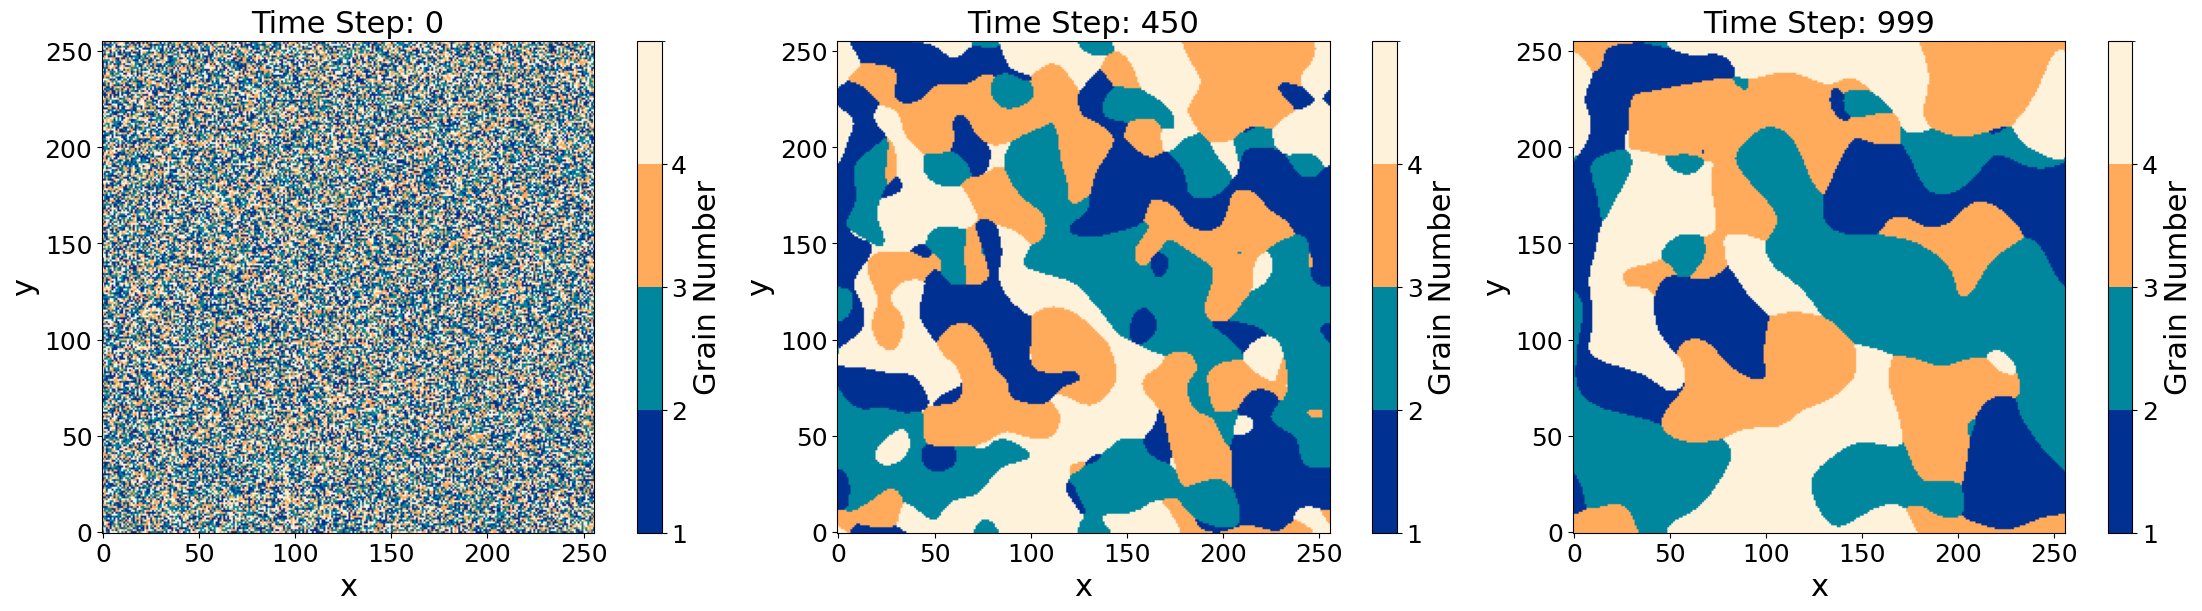

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors as mcolors
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap, BoundaryNorm

"""" Parameters kept the same for accurate comparison"""
Nx = Ny = 256
dx = dy = 1.0
dt = 1e-2     
nstep = 1000
print_step = 100
Ngrains = 4

# Model parameters
alpha = 0.5
beta = 2.5
gamma = 1.0
L = 1
kappa = 10.0

# Seed kept zero for comparison
np.random.seed(0)

# Initialize eta arrays using a random array (phi)
phi = np.random.randint(Ngrains, size=(Nx, Ny))
eta = {i: np.zeros((Nx, Ny)) for i in range(1, Ngrains + 1)}
for i in range(Nx):
    for j in range(Ny):
        eta[phi[i, j] + 1][i, j] = 1

# Laplacian calculations using Central Difference Method
def laplacian(f, dx, dy):
    return (
        (np.roll(f, -1, axis=0) + np.roll(f, 1, axis=0) - 2*f) / dx**2 +
        (np.roll(f, -1, axis=1) + np.roll(f, 1, axis=1) - 2*f) / dy**2
    )

# Store grain maps
grain_maps = []

# Time evolution loop
for step in range(nstep):
    etas_new = np.zeros((Ngrains, Nx, Ny))

    for i in range(1, Ngrains + 1):
        eta_i = eta[i]
        sum_eta_j_sq = np.sum([eta[j]**2 for j in range(1, Ngrains + 1) if j != i], axis=0)

        g = -alpha * eta_i + beta * eta_i**3 + 2 * gamma * eta_i * sum_eta_j_sq
        lap_eta = laplacian(eta_i, dx, dy)

        eta_i_new = eta_i - dt * L * (g - kappa * lap_eta)
        etas_new[i-1] = eta_i_new
    for i in range(1, Ngrains + 1):
        eta[i] = etas_new[i-1]

    if step % print_step == 0:
        grain_map = np.argmax(etas_new, axis=0) + 1  # Record grain maps
        grain_maps.append(grain_map.copy())

default_colors = np.array([
    [0, 48, 146],    
    [0, 135, 158],   
    [255, 171, 91],  
    [255, 242, 219], 
    [200, 50, 100],  
    [150, 255, 100], 
    [255, 255, 100], 
    [50, 50, 255]    
]) / 255.0

"""Colours used for plotting of 10 grains"""
# default_colors = np.array([
#     [239, 71, 111], 
#     [255, 209, 102],
#     [6, 214, 160],  
#     [17, 138, 178], 
#     [7, 59, 76],    
#     [255, 127, 80],   
#     [142, 202, 230],
#     [255, 183, 3],    
#     [131, 56, 236], 
#     [58, 134, 255]  
# ]) / 255.0

if Ngrains <= len(default_colors):
    grain_colors = default_colors[:Ngrains]
else:
    rng = np.random.default_rng(42)
    grain_colors = rng.uniform(0, 1, size=(Ngrains, 3))

cmap = ListedColormap(grain_colors)
norm = BoundaryNorm(boundaries=np.arange(1, Ngrains + 2), ncolors=Ngrains)
snapshot_steps = [0, 450, nstep - 1]
fig, axs = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

for i, ax in enumerate(axs):
    index = snapshot_steps[i] // print_step
    rgb_image = grain_colors[grain_maps[index] - 1]
    im = ax.imshow(rgb_image, origin='lower', cmap=cmap, norm=norm)
    ax.set_title(f'Time Step: {snapshot_steps[i]}', fontsize=22)
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.tick_params(axis='both', labelsize=18)
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_ticks(np.arange(1, Ngrains + 1))
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Grain Number', fontsize=22)

plt.savefig('Grain_FDM10.png', dpi = 300)
plt.show()

'''Animation'''
fig2, ax2 = plt.subplots(figsize=(6, 6))
rgb_image0 = grain_colors[grain_maps[0] - 1]
im = ax2.imshow(rgb_image0, origin='lower', cmap=cmap, norm=norm)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

cbar = fig2.colorbar(im, ax=ax2, orientation='vertical', fraction=0.05, pad=0.05, norm=norm)
cbar.set_ticks(np.arange(1, Ngrains + 1))
cbar.set_label('Grain Number')

def update(frame):
    rgb_image = grain_colors[grain_maps[frame] - 1]
    im.set_array(rgb_image)
    ax2.set_title(f'Time Step: {frame * print_step}')
    return [im]

ani = FuncAnimation(fig2, update, frames=len(grain_maps), interval=200, blit=True)
plt.close()

display(HTML(ani.to_jshtml()))

## Active Parameter Tracking Implementation

/tmp/ipykernel_19451/3998557967.py:175: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.3, hspace=0.3)  # Modify spacing


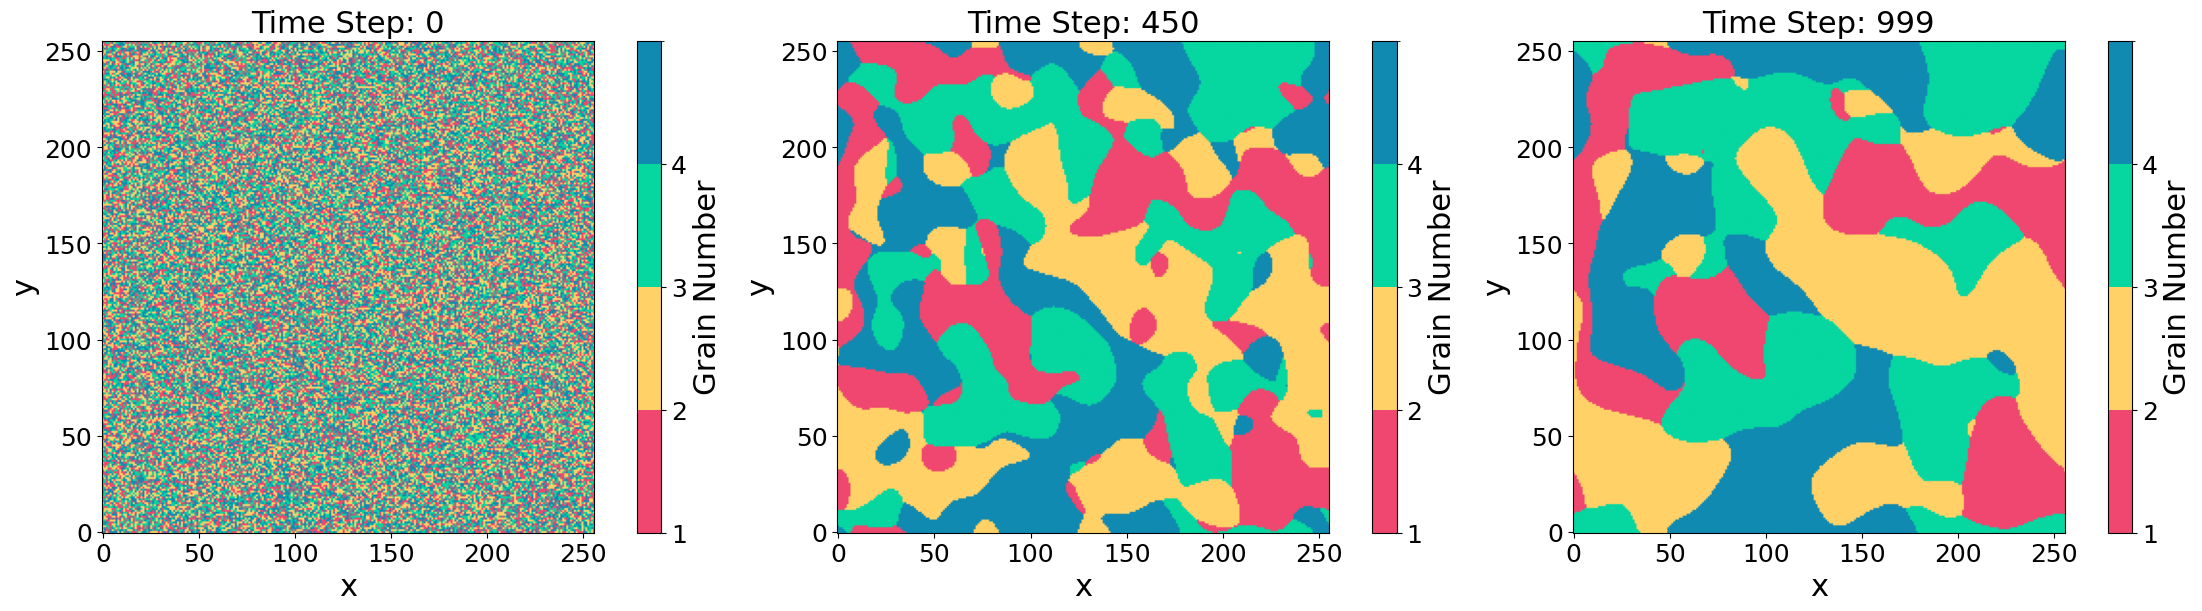

1751.8570802211761


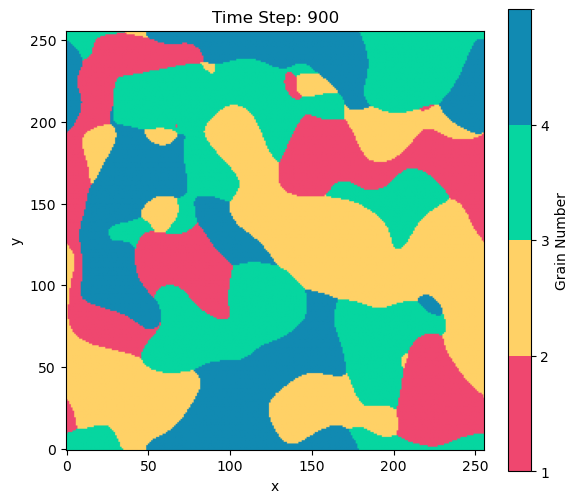

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors as mcolors
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap, BoundaryNorm

# Parameters
Nx = Ny = 256
dx = dy = 1.0
dt = 1e-2
nstep = 1000
print_step = 100
Ngrains = 4

# Model parameters
alpha = 0.5
beta = 2.5
gamma = 1.0
L = 1
kappa = 10.0

# random seed
np.random.seed(0)

phi = np.random.randint(Ngrains, size=(Nx, Ny))
eta = {i: np.zeros((Nx, Ny)) for i in range(1, Ngrains + 1)}
for i in range(Nx):
    for j in range(Ny):
        eta[phi[i, j] + 1][i, j] = 1

def laplacian(f, dx, dy):
    return (
        (np.roll(f, -1, axis=0) + np.roll(f, 1, axis=0) - 2*f) / dx**2 +
        (np.roll(f, -1, axis=1) + np.roll(f, 1, axis=1) - 2*f) / dy**2
    )

# Store grain maps
grain_maps = []

# Time evolution
epsilon = 1e-3  # APT threshold

neighbor_offsets = [(-1, -1), (-1, 0), (-1, 1),
                    (0, -1),  (0, 0),  (0, 1),
                    (1, -1),  (1, 0),  (1, 1)]

for step in range(nstep):
    etas_new = np.zeros((Ngrains, Nx, Ny))

    for i in range(Nx):
        for j in range(Ny):
            
            # set P(x,t) at  (i,j)
            P = {g for g in range(1, Ngrains + 1) if abs(eta[g][i, j]) > epsilon}

            # Q(x,t) from neighbors
            Q = set()
            for dx_, dy_ in neighbor_offsets:
                ni, nj = i + dx_, j + dy_
                if 0 <= ni < Nx and 0 <= nj < Ny:
                    for g in range(1, Ngrains + 1):
                        if abs(eta[g][ni, nj]) > epsilon:
                            Q.add(g)

            for g in Q:
                eta_g = eta[g]

                sum_eta_sq = sum(eta[gp][i, j]**2 for gp in Q if gp != g)

                g_term = -alpha * eta_g[i, j] + beta * eta_g[i, j]**3 + 2 * gamma * eta_g[i, j] * sum_eta_sq

                lap_eta = (
                    eta_g[(i+1)%Nx, j] + eta_g[(i-1)%Nx, j] + eta_g[i, (j+1)%Ny] + eta_g[i, (j-1)%Ny] - 4*eta_g[i, j]
                ) / dx**2

                eta_new = eta_g[i, j] - dt * L * (g_term - kappa * lap_eta)
                etas_new[g - 1, i, j] = eta_new
            for g in set(range(1, Ngrains+1)) - Q:
                etas_new[g - 1, i, j] = eta[g][i, j]

    for g in range(1, Ngrains + 1):
        eta[g] = etas_new[g-1]

    if step % print_step == 0:
        grain_map = np.argmax(etas_new, axis=0) + 1  # Record grain maps
        grain_maps.append(grain_map.copy())


# End timing the simulation
end_time = time.time()
total_time = end_time - start_time

default_colors = np.array([
    [0, 48, 146],    
    [0, 135, 158],   
    [255, 171, 91],  
    [255, 242, 219], 
    [200, 50, 100],  
    [150, 255, 100], 
    [255, 255, 100], 
    [50, 50, 255]    
]) / 255.0

# default_colors = np.array([
#     [239, 71, 111],   
#     [255, 209, 102],  
#     [6, 214, 160],    
#     [17, 138, 178],   
#     [7, 59, 76],      
#     [255, 127, 80],   
#     [142, 202, 230],  
#     [255, 183, 3],    
#     [131, 56, 236],   
#     [58, 134, 255]    
# ]) / 255.0


if Ngrains <= len(default_colors):
    grain_colors = default_colors[:Ngrains]
else:
    rng = np.random.default_rng(42)
    grain_colors = rng.uniform(0, 1, size=(Ngrains, 3))


'''Plotting'''
cmap = ListedColormap(grain_colors)
norm = BoundaryNorm(boundaries=np.arange(1, Ngrains + 2), ncolors=Ngrains)


snapshot_steps = [0, 450, nstep - 1]
fig, axs = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

for i, ax in enumerate(axs):
    index = snapshot_steps[i] // print_step
    rgb_image = grain_colors[grain_maps[index] - 1]
    im = ax.imshow(rgb_image, origin='lower', cmap=cmap, norm=norm)
    ax.set_title(f'Time Step: {snapshot_steps[i]}', fontsize=22)
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.tick_params(axis='both', labelsize=18)
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_ticks(np.arange(1, Ngrains + 1))
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Grain Number', fontsize=22)

    
fig.subplots_adjust(wspace=0.3, hspace=0.3)  
plt.savefig('APT_4.png', dpi = 300)
plt.show()

'''Animation'''
fig2, ax2 = plt.subplots(figsize=(6, 6))
rgb_image0 = grain_colors[grain_maps[0] - 1]
im = ax2.imshow(rgb_image0, origin='lower', cmap=cmap, norm=norm)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

cbar = fig2.colorbar(im, ax=ax2, orientation='vertical', fraction=0.05, pad=0.05, norm=norm)
cbar.set_ticks(np.arange(1, Ngrains + 1))
cbar.set_label('Grain Number')

def update(frame):
    rgb_image = grain_colors[grain_maps[frame] - 1]
    im.set_array(rgb_image)
    ax2.set_title(f'Time Step: {frame * print_step}')
    return [im]

ani = animation.FuncAnimation(fig2, update, frames=len(grain_maps), blit=True)

ani.save("grain_growth.mp4", writer='ffmpeg', fps=10, dpi=100)
print(total_time)

## Understand Initialising

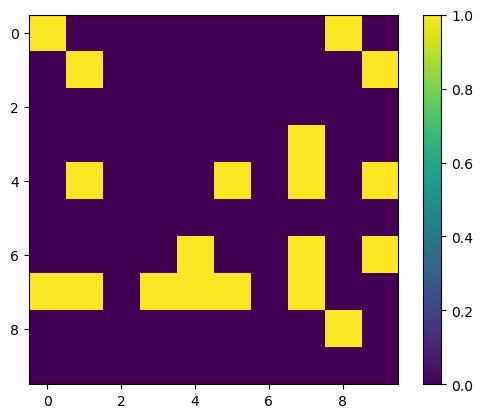

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors as mcolors
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap, BoundaryNorm
Nx = Ny = 10
Ngrains = 5
np.random.seed(0)
phi = np.random.randint(Ngrains, size=(Nx, Ny))
eta = {i: np.zeros((Nx, Ny)) for i in range(1, Ngrains + 1)}
for i in range(Nx):
    for j in range(Ny):
        eta[phi[i, j] + 1][i, j] = 1
        
plt.imshow(eta[5])
plt.savefig('5.png', dpi = 300)
# plt.imshow(phi)
plt.colorbar()
# eta[1][1,1]


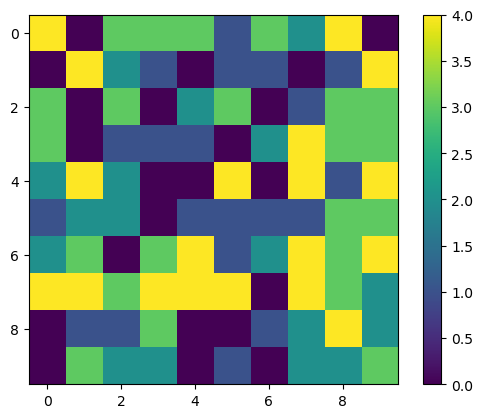

In [75]:

plt.imshow(phi, cmap = 'viridis')
plt.savefig('total.png', dpi = 300)
plt.colorbar()